Machine Learning Models - Commodity Data

#KNN MODEL, RANDOM FOREST, and MULTILinear Regress - ALL FEATURES INCLUDED/Filtered in this book

In [1]:
# import Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy.stats import linregress
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [2]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
csv_file_train_model_all = os.path.join("train_all_combined.csv")
csv_file_test_model_all = os.path.join("test_all_combined.csv")
train_model_all_df = pd.read_csv(csv_file_train_model_all)
test_model_all_df = pd.read_csv(csv_file_test_model_all)
train_model_all_df.dropna()
test_model_all_df.dropna()
train_model_all_df.isnull().sum()


Unnamed: 0                  0
Unnamed: 0_x                0
Date                        0
Gold_Dly_Pct_Return         0
gold_MA_55                  0
                           ..
Div/10Yr-2Yr                0
SP500_corr_6Mo-3Mo_%_Ret    0
Fwd_SP500_%_Ret             0
SP500_ret_signal            0
SP500_pos_neg_ret_signal    0
Length: 189, dtype: int64

In [4]:
train_model_all_df.head()

,Unnamed: 0,Unnamed: 0_x,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,0,36,1998-06-22,-1.23,-0.039091,0.730,-0.0835,0.07,-0.019091,0.654,...,-1.887951,-0.823519,1.376173,3.675653,4.864961,-23.666667,0.035087,3.102837,4,1
1,1,37,1998-06-23,-0.24,-0.080000,0.444,-0.0230,-0.79,-0.013455,0.428,...,-1.314983,-0.131021,2.324225,4.903236,6.242116,-35.250000,0.035004,1.468976,3,1
2,2,38,1998-06-24,-0.74,-0.099818,-0.042,-0.0280,-0.67,-0.034000,-0.074,...,-0.969337,0.429224,3.348297,6.442141,8.059582,-46.333333,0.038370,1.386482,3,1
3,3,39,1998-06-25,0.31,-0.097636,0.040,-0.0025,-0.27,-0.062545,0.086,...,-1.726144,-0.194098,3.017911,6.443535,8.243226,-19.857143,0.041260,1.084599,3,1
4,4,40,1998-06-26,-0.03,-0.092909,-0.386,0.0045,-0.74,-0.088909,-0.480,...,-1.765028,-0.056179,3.546305,7.418204,9.464808,-27.600000,0.043665,1.550388,3,1


In [5]:
#check range
training_master_df = train_model_all_df.reset_index().copy()
print(f"Training Start Date: {training_master_df.Date[0]}")
print(f"Training End Date: {training_master_df.Date[len(training_master_df)-1]}")
training_master_df = training_master_df.drop(columns=['Date'])
# training_master_df = training_master_df.drop(columns=['Unnamed: 0'])

training_master_df

Training Start Date: 1998-06-22
Training End Date: 2016-05-02


,index,Unnamed: 0,Unnamed: 0_x,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,0,0,36,-1.23,-0.039091,0.730,-0.0835,0.07,-0.019091,0.654,...,-1.887951,-0.823519,1.376173,3.675653,4.864961,-23.666667,0.035087,3.102837,4,1
1,1,1,37,-0.24,-0.080000,0.444,-0.0230,-0.79,-0.013455,0.428,...,-1.314983,-0.131021,2.324225,4.903236,6.242116,-35.250000,0.035004,1.468976,3,1
2,2,2,38,-0.74,-0.099818,-0.042,-0.0280,-0.67,-0.034000,-0.074,...,-0.969337,0.429224,3.348297,6.442141,8.059582,-46.333333,0.038370,1.386482,3,1
3,3,3,39,0.31,-0.097636,0.040,-0.0025,-0.27,-0.062545,0.086,...,-1.726144,-0.194098,3.017911,6.443535,8.243226,-19.857143,0.041260,1.084599,3,1
4,4,4,40,-0.03,-0.092909,-0.386,0.0045,-0.74,-0.088909,-0.480,...,-1.765028,-0.056179,3.546305,7.418204,9.464808,-27.600000,0.043665,1.550388,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3636,3636,3804,0.26,0.136364,-0.168,0.0310,-0.47,0.124545,0.166,...,-1.852089,-0.903320,1.050331,3.082562,4.129642,1.972222,0.071204,-1.514059,1,0
3637,3637,3637,3805,0.56,0.083455,-0.058,0.0915,-1.14,0.114545,-0.192,...,-1.894266,-0.924894,1.072477,3.152040,4.224246,2.048077,0.069327,-2.100588,1,0
3638,3638,3638,3806,1.34,0.106545,0.276,0.1295,0.52,0.168364,-0.204,...,-2.749054,-1.806081,0.135810,2.156057,3.197060,2.028302,0.080180,-1.380480,2,0
3639,3639,3639,3807,1.90,0.147273,0.980,0.2735,2.36,0.222364,0.148,...,-3.374955,-2.432835,-0.492384,1.526819,2.567465,2.037736,0.069517,-0.316880,2,0


In [6]:
training_master_df.head()

,index,Unnamed: 0,Unnamed: 0_x,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,0,0,36,-1.23,-0.039091,0.730,-0.0835,0.07,-0.019091,0.654,...,-1.887951,-0.823519,1.376173,3.675653,4.864961,-23.666667,0.035087,3.102837,4,1
1,1,1,37,-0.24,-0.080000,0.444,-0.0230,-0.79,-0.013455,0.428,...,-1.314983,-0.131021,2.324225,4.903236,6.242116,-35.250000,0.035004,1.468976,3,1
2,2,2,38,-0.74,-0.099818,-0.042,-0.0280,-0.67,-0.034000,-0.074,...,-0.969337,0.429224,3.348297,6.442141,8.059582,-46.333333,0.038370,1.386482,3,1
3,3,3,39,0.31,-0.097636,0.040,-0.0025,-0.27,-0.062545,0.086,...,-1.726144,-0.194098,3.017911,6.443535,8.243226,-19.857143,0.041260,1.084599,3,1
4,4,4,40,-0.03,-0.092909,-0.386,0.0045,-0.74,-0.088909,-0.480,...,-1.765028,-0.056179,3.546305,7.418204,9.464808,-27.600000,0.043665,1.550388,3,1


In [7]:
#check the date range
testing_master_df = test_model_all_df.reset_index().copy()
print(f"Testing Start Date: {testing_master_df.Date[0]}")
print(f"Testing End Date: {testing_master_df.Date[len(testing_master_df)-1]}")
testing_master_df = testing_master_df.drop(columns=['index','Date'])
testing_master_df = testing_master_df.drop(columns=['Unnamed: 0'])
testing_master_df.head()

Testing Start Date: 2016-05-03
Testing End Date: 2020-07-10


,Unnamed: 0_x,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,3809,-0.31,0.080545,0.780,0.2530,-2.12,0.168727,-0.220,0.1895,0.001715,...,-3.386872,-2.503196,-0.686446,1.199296,2.169279,2.037736,0.081921,0.988287,3,1
1,3810,-1.35,0.102000,0.398,0.2095,-1.47,0.122364,-0.286,0.1030,0.001713,...,-3.911510,-3.005101,-1.139993,0.798249,1.796153,2.086538,0.073225,0.527219,3,1
2,3811,-0.16,0.094364,0.098,0.1455,-1.44,0.074545,-0.678,0.1875,0.001691,...,-3.967145,-3.096694,-1.307578,0.548846,1.503496,2.096154,0.070996,0.724460,3,1
3,3812,1.71,0.103091,0.060,0.2050,-0.05,0.075455,-1.160,0.1595,0.001662,...,-3.465682,-2.629481,-0.912852,0.865391,1.778664,2.066667,0.064059,-0.452378,2,0
4,3813,-2.12,0.057818,-0.446,0.0420,-2.19,0.033091,-1.454,0.0415,0.001661,...,-3.208976,-2.447552,-0.888192,0.721831,1.546618,2.066667,0.062722,0.403177,3,1


In [8]:
training_master_df.corr()

,index,Unnamed: 0,Unnamed: 0_x,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
index,1.000000,1.000000,0.999990,-0.006330,-0.073294,-0.017861,-0.052804,-0.012353,-0.112875,-0.045445,...,0.180140,0.157793,0.056078,-0.099396,-0.136860,-0.010509,-0.085124,0.033975,0.040225,0.053263
Unnamed: 0,1.000000,1.000000,0.999990,-0.006330,-0.073294,-0.017861,-0.052804,-0.012353,-0.112875,-0.045445,...,0.180140,0.157793,0.056078,-0.099396,-0.136860,-0.010509,-0.085124,0.033975,0.040225,0.053263
Unnamed: 0_x,0.999990,0.999990,1.000000,-0.006375,-0.073544,-0.017904,-0.052976,-0.012246,-0.112611,-0.045241,...,0.180172,0.157953,0.056639,-0.098616,-0.136141,-0.010351,-0.084887,0.034266,0.040525,0.053538
Gold_Dly_Pct_Return,-0.006330,-0.006330,-0.006375,1.000000,0.120695,0.452834,0.216918,0.314611,0.021882,0.118011,...,0.001957,0.003385,0.004816,-0.001558,-0.006620,0.017750,0.004880,0.004410,-0.005256,-0.025209
gold_MA_55,-0.073294,-0.073294,-0.073544,0.120695,1.000000,0.275428,0.546256,0.066780,0.322150,0.148218,...,-0.048296,-0.042055,-0.016530,0.017881,0.023480,0.031280,0.061855,0.012278,-0.008157,-0.015047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Div/10Yr-2Yr,-0.010509,-0.010509,-0.010351,0.017750,0.031280,0.010807,0.063614,0.059186,0.005565,0.042227,...,-0.027252,-0.022233,-0.001384,0.025768,0.030987,1.000000,-0.013367,-0.008347,-0.002817,-0.006061
SP500_corr_6Mo-3Mo_%_Ret,-0.085124,-0.085124,-0.084887,0.004880,0.061855,0.000284,-0.015866,-0.023426,-0.085338,-0.048226,...,-0.152912,-0.147362,-0.103472,0.004616,0.042673,-0.013367,1.000000,-0.026254,-0.031277,-0.035941
Fwd_SP500_%_Ret,0.033975,0.033975,0.034266,0.004410,0.012278,-0.039749,-0.076828,-0.028408,0.052833,-0.075240,...,-0.110585,-0.116108,-0.110934,-0.041659,-0.006928,-0.008347,-0.026254,1.000000,0.853072,0.712038
SP500_ret_signal,0.040225,0.040225,0.040525,-0.005256,-0.008157,-0.063081,-0.075643,-0.022263,0.027514,-0.082272,...,-0.083578,-0.086880,-0.081518,-0.030873,-0.006382,-0.002817,-0.031277,0.853072,1.000000,0.831969


In [9]:
testing_master_df.isnull().sum()
testing_master_df['Settle'] = testing_master_df['Settle_x'].replace(np.nan, 0)
testing_master_df['Settle'] = testing_master_df['Settle_y'].replace(np.nan, 0)
testing_master_df.isnull().sum()
testing_master_df.head()

,Unnamed: 0_x,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal,Settle
0,3809,-0.31,0.080545,0.780,0.2530,-2.12,0.168727,-0.220,0.1895,0.001715,...,-2.503196,-0.686446,1.199296,2.169279,2.037736,0.081921,0.988287,3,1,0.988287
1,3810,-1.35,0.102000,0.398,0.2095,-1.47,0.122364,-0.286,0.1030,0.001713,...,-3.005101,-1.139993,0.798249,1.796153,2.086538,0.073225,0.527219,3,1,0.527219
2,3811,-0.16,0.094364,0.098,0.1455,-1.44,0.074545,-0.678,0.1875,0.001691,...,-3.096694,-1.307578,0.548846,1.503496,2.096154,0.070996,0.724460,3,1,0.724460
3,3812,1.71,0.103091,0.060,0.2050,-0.05,0.075455,-1.160,0.1595,0.001662,...,-2.629481,-0.912852,0.865391,1.778664,2.066667,0.064059,-0.452378,2,0,-0.452378
4,3813,-2.12,0.057818,-0.446,0.0420,-2.19,0.033091,-1.454,0.0415,0.001661,...,-2.447552,-0.888192,0.721831,1.546618,2.066667,0.062722,0.403177,3,1,0.403177


# Data Loading and Machine Learning

In [10]:
#CELL CONTAINS FEATURE OPTIONS THAT CAN BE SELECTED/DESELECTED
# Assigning data to X and y

# Training Data
X_train = training_master_df[[
#                               'Gold_Dly_Pct_Return',
                              'gold_MA_55',
                              'gold_MA_5',
#                               'gold_MA_20',
#                               'Copper_Dly_Pct_Return',
                              'copper_MA_55',
                              'copper_MA_5',
#                               'copper_MA_20',
#                               'cgr_Dly_Pct_Return',
#                               'cgr_MA_5',
#                               'crg_MA_20',
#                               'crg_MA_55',
#                               'Crude_Dly_Pct_Return',
                              'crude_MA_55',
                              'crude_MA_5',
#                               'crude_MA_20',
#                                     'LNH_Dly_Pct_Return',
                                'lnh_MA_55',
                                'lnh_MA_5',
#                                 'lnh_MA_20',
#                                 'SoyB_Dly_Pct_Return', 
                                'soyb_MA_55', 
                                'soyb_MA_5',
#                                 'soyb_MA_20',
#                                     'Cotton_Dly_Pct_Return',
#                                     'corn_Dly_Pct_Return',
                                    'corn_MA_55',
                                    'corn_MA_5',
#                                     'corn_MA_20',
#                                 'SPGold_dly_chg_corr_mean_x',
#                               'SPGoldsignal_x',
#                               'SPCopp_dly_chg_corr_mean_x',
#                               'SPCoppsignal55_x',
#                               'SPCgr_dly_chg_corr_mean_x',
#                               'SPCgrsignal55_x',
#                               'SPCrude_dly_chg_corr_mean_x',
#                               'SPCrudesignal55_x',
#                               'SPLNH_dly_chg_corr_mean_x',
#                               'SPLNHsignal55_x',
#                               'SPSoyB_dly_chg_corr_mean_x',
#                               'SPSoyBsignal55_x',
#                               'SPCtn_dly_chg_corr_mean_x',
#                               'SPCtnsignal55_x',
#                               'SPcorn_dly_chg_corr_mean_x',
#                               'SPcornsignal55_x',
#                                     'SPGold_sigcode_x',
#                                 'SPCopp_sigcode_x',
#                                 'SPCgrsignal55_sigcode_x',
#                                 'SPCrudesignal55_sigcode_x',
#                                 'SPLNHsignal55_sigcode_x', 
#                                 'SPSoyBsignal55_sigcode_x', 
#                                 'SPCtnsignal55_sigcode_x',
#                                 'SPcornsignal55_sigcode_x',
#                                 'SP_Goldupper_correl_x',
#                                 'SP_Goldlower_correl_x',
#                                 'SP_Coppupper_correl_x',
#                                 'SP_Copplower_correl_x',
#                                 'SP_Cgrupper_correl_x',
#                                 'SP_Cgrlower_correl_x',
#                                 'SP_Crudeupper_correl_x',
#                                 'SP_Crudelower_correl_x',
#                                     'SP_LNHupper_correl_x',
#                                 'SP_LNHlower_correl_x',
#                                 'SP_SoyBupper_correl_x',
#                                 'SP_SoyBlower_correl_x',
#                                 'Vix Daily Chg._y',
#                                 'SP500_corr_6Mo-3Mo_%_Ret',
#                                 '50SMA%100SMA',
#                                 'RSI'                               
    
                                ]]

y_train = training_master_df['SP_ret_code_y'].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

# Testing Data
X_test = testing_master_df[[                             
#                               'Gold_Dly_Pct_Return',
                              'gold_MA_55',
                              'gold_MA_5',
# #                               'gold_MA_20',
#                               'Copper_Dly_Pct_Return',
                              'copper_MA_55',
                              'copper_MA_5',
#                               'copper_MA_20',
#                               'cgr_Dly_Pct_Return',
#                               'cgr_MA_5',
#                               'crg_MA_20',
#                               'crg_MA_55',
#                               'Crude_Dly_Pct_Return',
                              'crude_MA_55',
                              'crude_MA_5',
#                               'crude_MA_20',
#                                     'LNH_Dly_Pct_Return',
                                'lnh_MA_55',
                                'lnh_MA_5',
#                                 'lnh_MA_20',
#                                 'SoyB_Dly_Pct_Return', 
                                'soyb_MA_55', 
                                'soyb_MA_5',
#                                 'soyb_MA_20',
#                                     'Cotton_Dly_Pct_Return',
#                                     'corn_Dly_Pct_Return',
                                    'corn_MA_55',
                                    'corn_MA_5',
#                                     'corn_MA_20',
#                                 'SPGold_dly_chg_corr_mean_x',
#                               'SPGoldsignal_x',
#                               'SPCopp_dly_chg_corr_mean_x',
#                               'SPCoppsignal55_x',
#                               'SPCgr_dly_chg_corr_mean_x',
#                               'SPCgrsignal55_x',
#                               'SPCrude_dly_chg_corr_mean_x',
#                               'SPCrudesignal55_x',
#                               'SPLNH_dly_chg_corr_mean_x',
#                               'SPLNHsignal55_x',
#                               'SPSoyB_dly_chg_corr_mean_x',
#                               'SPSoyBsignal55_x',
#                               'SPCtn_dly_chg_corr_mean_x',
#                               'SPCtnsignal55_x',
#                               'SPcorn_dly_chg_corr_mean_x',
#                               'SPcornsignal55_x',
#                                     'SPGold_sigcode_x',
#                                 'SPCopp_sigcode_x',
#                                 'SPCgrsignal55_sigcode_x',
#                                 'SPCrudesignal55_sigcode_x',
#                                 'SPLNHsignal55_sigcode_x', 
#                                 'SPSoyBsignal55_sigcode_x', 
#                                 'SPCtnsignal55_sigcode_x',
#                                 'SPcornsignal55_sigcode_x',
#                                 'SP_Goldupper_correl_x',
#                                 'SP_Goldlower_correl_x',
#                                 'SP_Coppupper_correl_x',
#                                 'SP_Copplower_correl_x',
#                                 'SP_Cgrupper_correl_x',
#                                 'SP_Cgrlower_correl_x',
#                                 'SP_Crudeupper_correl_x',
#                                 'SP_Crudelower_correl_x',
#                                     'SP_LNHupper_correl_x',
#                                 'SP_LNHlower_correl_x',
#                                 'SP_SoyBupper_correl_x',
#                                 'SP_SoyBlower_correl_x',
#                                 'Vix Daily Chg._y',
#                                     'SP500_corr_6Mo-3Mo_%_Ret',
#                                 '50SMA%100SMA',
#                                 'RSI'
                                            ]]

y_test = testing_master_df['SP_ret_code_y'].values.reshape(-1,1)
print(X_test.shape, y_test.shape)

(3641, 12) (3641, 1)
(1027, 12) (1027, 1)


In [11]:
X_train

,gold_MA_55,gold_MA_5,copper_MA_55,copper_MA_5,crude_MA_55,crude_MA_5,lnh_MA_55,lnh_MA_5,soyb_MA_55,soyb_MA_5,corn_MA_55,corn_MA_5
0,-0.039091,0.730,-0.019091,0.654,-0.274727,0.972,0.093091,-0.202,0.011455,1.274,-0.047091,1.504
1,-0.080000,0.444,-0.013455,0.428,-0.112909,2.732,0.068364,-0.564,0.079636,1.488,0.018000,1.674
2,-0.099818,-0.042,-0.034000,-0.074,-0.060727,1.996,0.095818,-0.442,0.109636,1.408,0.077091,1.318
3,-0.097636,0.040,-0.062545,0.086,-0.082545,2.296,0.078364,-0.538,0.091273,0.888,0.053273,0.938
4,-0.092909,-0.386,-0.088909,-0.480,-0.116182,2.290,0.080909,-0.568,0.061091,-0.006,0.028909,0.108
...,...,...,...,...,...,...,...,...,...,...,...,...
3636,0.136364,-0.168,0.124545,0.166,0.636909,1.140,0.200727,-0.278,0.294364,0.664,0.086909,-0.086
3637,0.083455,-0.058,0.114545,-0.192,0.750000,0.918,0.254182,-0.026,0.307091,0.196,0.093455,-0.742
3638,0.106545,0.276,0.168364,-0.204,0.885636,1.298,0.286545,0.320,0.303636,-0.002,0.129091,0.096
3639,0.147273,0.980,0.222364,0.148,0.883636,0.968,0.340727,0.726,0.311091,0.680,0.135091,0.854


In [12]:
y_train

array([[4],
       [4],
       [4],
       ...,
       [1],
       [2],
       [1]], dtype=int64)

In [13]:
X_test

,gold_MA_55,gold_MA_5,copper_MA_55,copper_MA_5,crude_MA_55,crude_MA_5,lnh_MA_55,lnh_MA_5,soyb_MA_55,soyb_MA_5,corn_MA_55,corn_MA_5
0,0.080545,0.780,0.168727,-0.220,0.650545,-0.190,0.314364,1.280,0.290364,0.076,0.088182,-0.378
1,0.102000,0.398,0.122364,-0.286,0.704545,-0.770,0.296000,0.590,0.281091,0.110,0.052545,-0.406
2,0.094364,0.098,0.074545,-0.678,0.606545,-0.840,0.132182,0.384,0.238182,-0.280,0.019455,-0.904
3,0.103091,0.060,0.075455,-1.160,0.625818,-0.582,0.112545,-0.102,0.285091,0.116,0.046182,-0.730
4,0.057818,-0.446,0.033091,-1.454,0.639091,-0.634,0.122909,-0.622,0.274909,-0.314,0.007818,-1.180
...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0.091273,0.278,0.354545,0.824,1.628545,1.064,0.293818,0.474,0.132364,0.764,0.118000,1.674
1023,0.141818,0.348,0.327091,0.780,1.662909,0.450,0.256000,0.176,0.135091,0.658,0.085455,0.904
1024,0.140545,0.268,0.363636,0.728,2.012364,0.854,0.116727,-0.440,0.147091,0.236,0.138727,0.288
1025,0.151091,0.302,0.443636,0.788,2.747273,-0.030,0.130182,0.488,0.144909,0.100,0.180000,-0.096


In [14]:
y_test

array([[4],
       [4],
       [4],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

Scaling the data for models

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# X_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

LINEAR REGRESSION

In [16]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -0.09594047355613133
Testing Score: -0.3789562207654427


In [18]:
y_test_scaled.shape

(1027, 1)

In [19]:
# Plot the results LINEAR REGRESS
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()

In [20]:
# from sklearn.metrics import mean_squared_error
#2 CALC FOR LINEAR REGRESS

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")

In [21]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# # plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
# plt.title("Residual Plot")
# plt.xlabel("Predicted value")
# plt.ylabel("Prediction error")
# plt.show()
### END SOLUTION

In [22]:
csv_file_train_model_coded = os.path.join("model_coded_train_df.csv")
csv_file_test_model_coded = os.path.join("model_coded_test_df.csv")
train_model_coded_df = pd.read_csv(csv_file_train_model_coded)
test_model_coded_df = pd.read_csv(csv_file_test_model_coded)

In [23]:
train_model_coded_df.head()

,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,...,0,0,-8.69,19.34,0,0,0,0,1,1
1,2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,...,0,0,5.07,20.32,0,0,1,0,1,1
2,3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,...,0,0,5.61,21.46,0,0,1,1,1,2
3,4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,...,2,0,6.20,22.79,0,0,1,1,1,4
4,5,1998-05-07,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,...,2,2,2.63,23.39,0,0,1,1,1,4


In [24]:
train_model_coded_df = train_model_coded_df.drop(columns=['Date','SP_ret_code','Unnamed: 0'])
test_model_coded_df = test_model_coded_df.drop(columns=['Date'])

KNN

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_scaler = StandardScaler().fit(X_train)

In [26]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.361
k: 3, Train/Test Score: 0.816/0.377
k: 5, Train/Test Score: 0.756/0.403
k: 7, Train/Test Score: 0.727/0.435
k: 9, Train/Test Score: 0.694/0.437
k: 11, Train/Test Score: 0.676/0.449
k: 13, Train/Test Score: 0.659/0.462
k: 15, Train/Test Score: 0.645/0.461
k: 17, Train/Test Score: 0.635/0.460
k: 19, Train/Test Score: 0.622/0.470
k: 21, Train/Test Score: 0.610/0.478
k: 23, Train/Test Score: 0.605/0.491
k: 25, Train/Test Score: 0.597/0.489
k: 27, Train/Test Score: 0.591/0.493
k: 29, Train/Test Score: 0.588/0.490
k: 31, Train/Test Score: 0.585/0.492
k: 33, Train/Test Score: 0.579/0.485
k: 35, Train/Test Score: 0.575/0.497
k: 37, Train/Test Score: 0.574/0.495
k: 39, Train/Test Score: 0.569/0.503
k: 41, Train/Test Score: 0.567/0.504
k: 43, Train/Test Score: 0.567/0.509
k: 45, Train/Test Score: 0.566/0.507
k: 47, Train/Test Score: 0.564/0.502
k: 49, Train/Test Score: 0.559/0.504
k: 51, Train/Test Score: 0.558/0.501
k: 53, Train/Test Score: 0.557/0.499
k: 55,

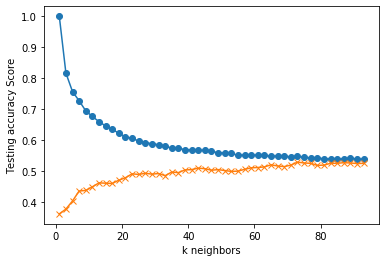

In [27]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 95, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train.ravel())
    test_score = knn.score(X_test_scaled, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 95, 2), train_scores, marker='o')
plt.plot(range(1, 95, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_scaled, y_train)
print('k=43 Test Acc: %.3f' % knn.score(X_test_scaled, y_test.ravel()))

In [39]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_scaled, y_train)
print('k=43 Test Acc: %.3f' % knn.score(X_test_scaled, y_test.ravel()))

k=43 Test Acc: 0.509


C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [40]:
#retrain model using optimal
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#GENERATE KNN MODEL STATS - PRECISION IS ACCURACY OF EACH RETURN BUCKET
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
# plot_confusion_matrix(KNeighborsClassifier, X_test_scaled, X_test_scaled, cmap=plt.cm.Blues, display_labels=["purple", "yellow"])

# plt.show()

              precision    recall  f1-score   support

           1       0.26      0.23      0.25       219
           2       0.00      0.00      0.00       153
           3       0.00      0.00      0.00        91
           4       0.57      0.84      0.68       564

    accuracy                           0.51      1027
   macro avg       0.21      0.27      0.23      1027
weighted avg       0.37      0.51      0.42      1027



C:\Users\bruce\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
results_df = pd.concat([test_model_all_df, pd.DataFrame(pred)], axis=1)
results_df.head()

,Unnamed: 0,Unnamed: 0_x,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal,0
0,0,3809,2016-05-03,-0.31,0.080545,0.780,0.2530,-2.12,0.168727,-0.220,...,-2.503196,-0.686446,1.199296,2.169279,2.037736,0.081921,0.988287,3,1,4
1,1,3810,2016-05-04,-1.35,0.102000,0.398,0.2095,-1.47,0.122364,-0.286,...,-3.005101,-1.139993,0.798249,1.796153,2.086538,0.073225,0.527219,3,1,4
2,2,3811,2016-05-05,-0.16,0.094364,0.098,0.1455,-1.44,0.074545,-0.678,...,-3.096694,-1.307578,0.548846,1.503496,2.096154,0.070996,0.724460,3,1,4
3,3,3812,2016-05-06,1.71,0.103091,0.060,0.2050,-0.05,0.075455,-1.160,...,-2.629481,-0.912852,0.865391,1.778664,2.066667,0.064059,-0.452378,2,0,4
4,4,3813,2016-05-09,-2.12,0.057818,-0.446,0.0420,-2.19,0.033091,-1.454,...,-2.447552,-0.888192,0.721831,1.546618,2.066667,0.062722,0.403177,3,1,4


In [43]:
results_df.to_csv("results_all.csv")

RANDOM FOREST

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.35443037974683544

In [45]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.48490749756572543

In [46]:
feature_names = X_train.columns

In [47]:
#COEFFICIENT (FEATURE IMPORTANCE OF MODEL)
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09349880087907268, 'lnh_MA_55'),
 (0.09046662778080145, 'corn_MA_55'),
 (0.0886611262922781, 'soyb_MA_55'),
 (0.08777126995560519, 'gold_MA_55'),
 (0.08749988435899556, 'copper_MA_55'),
 (0.0851988914785093, 'crude_MA_55'),
 (0.07881472582048618, 'soyb_MA_5'),
 (0.07841962386025791, 'copper_MA_5'),
 (0.0778334638156415, 'lnh_MA_5'),
 (0.07774401170103751, 'corn_MA_5'),
 (0.07752245606584783, 'crude_MA_5'),
 (0.07656911799146694, 'gold_MA_5')]

In [48]:
# # testing_master_df.corr()
# corr_matrix = testing_master_df.corr().abs()
# corr = testing_master_df.corr() 
# c1 = corr.abs().unstack()
# c1.sort_values(ascending = False)
train_model_all_df.head()

,Unnamed: 0,Unnamed: 0_x,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,0,36,1998-06-22,-1.23,-0.039091,0.730,-0.0835,0.07,-0.019091,0.654,...,-1.887951,-0.823519,1.376173,3.675653,4.864961,-23.666667,0.035087,3.102837,4,1
1,1,37,1998-06-23,-0.24,-0.080000,0.444,-0.0230,-0.79,-0.013455,0.428,...,-1.314983,-0.131021,2.324225,4.903236,6.242116,-35.250000,0.035004,1.468976,3,1
2,2,38,1998-06-24,-0.74,-0.099818,-0.042,-0.0280,-0.67,-0.034000,-0.074,...,-0.969337,0.429224,3.348297,6.442141,8.059582,-46.333333,0.038370,1.386482,3,1
3,3,39,1998-06-25,0.31,-0.097636,0.040,-0.0025,-0.27,-0.062545,0.086,...,-1.726144,-0.194098,3.017911,6.443535,8.243226,-19.857143,0.041260,1.084599,3,1
4,4,40,1998-06-26,-0.03,-0.092909,-0.386,0.0045,-0.74,-0.088909,-0.480,...,-1.765028,-0.056179,3.546305,7.418204,9.464808,-27.600000,0.043665,1.550388,3,1


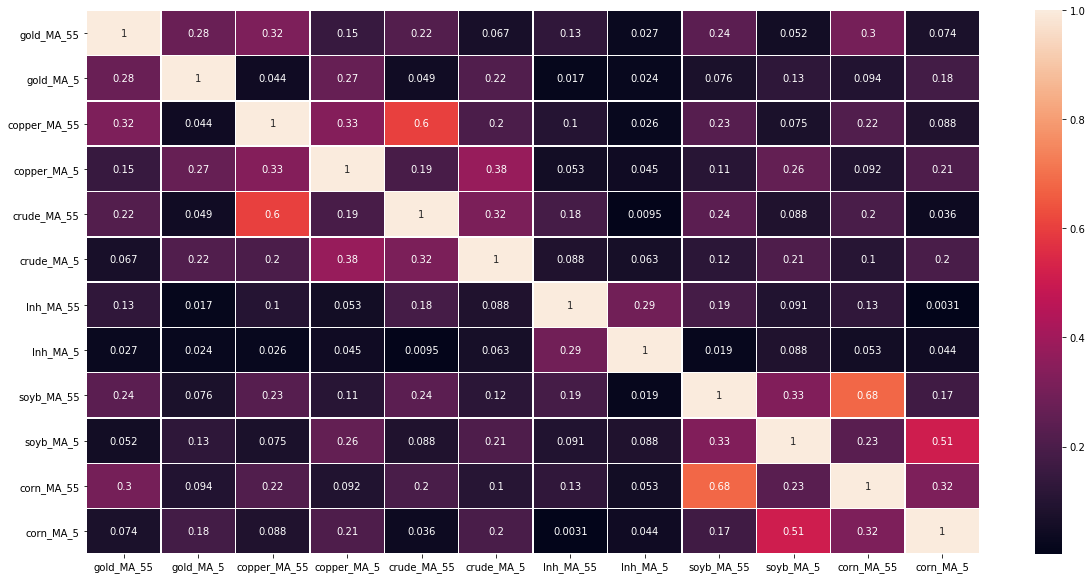

In [49]:
#HEAT MAP OF FEATURES USED IN FINAL KNN MODEL

fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(train_model_all_df[['gold_MA_55','gold_MA_5','copper_MA_55','copper_MA_5',
                                    'crude_MA_55','crude_MA_5','lnh_MA_55','lnh_MA_5',
                                    'soyb_MA_55','soyb_MA_5','corn_MA_55','corn_MA_5']].corr(), annot=True, linewidth=0.5)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
ax.xaxis.set_label_position("top")
#fig.tight_layout()
plt.show()